In [24]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as go
import datetime
import plotly.express as px
import json
import requests as re
import scipy.stats as stats
# conda install -c conda-forge psycopg2

In [31]:
import warnings
warnings.filterwarnings('ignore')

### Task 7: Test the hypothesis whether planes fly faster when there is the departure delay?


In [ ]:
#going to determine speed of our flight based upon air_time divided by distance travelled
#conduct some test to determine whether there is correlation between speed and whether a depature delay has taken place

In [82]:
df_7 = pd.read_csv('Data/FLIGHTS_cleaned.csv')

In [83]:
df_7 = df_7[['dep_delay','air_time','distance']]
df_7.head()
df_7.shape

(196555, 3)

In [84]:
def avg_plane_velo(time,distance):
    '''Creating a basic function derived from kinematics that takes in airtime (minutes) and distance(miles) to return the average plane velocity, want the si unit to be in Mph'''
    return distance / time *60

In [85]:
df_7["average_fl_speed"] =  df_7.apply(lambda x: avg_plane_velo(x.air_time, x.distance), axis=1)

In [1]:
#need to compare our dataframe when there is a depature delay vs when there is no depature delay seeing how the average speeds differ

In [88]:
dep_delay = df_7[df_7['dep_delay'] > 0]
no_dep_delay = df_7[df_7['dep_delay'] <= 0]

In [89]:
dep_delay.info
dep_delay.head()
# dep_delay.describe()

,dep_delay,air_time,distance,average_fl_speed
0,72.0,129.0,1017.0,473.023256
1,30.0,255.0,2077.0,488.705882
3,36.0,64.0,407.0,381.562500
6,8.0,99.0,611.0,370.303030
13,3.0,51.0,341.0,401.176471


In [90]:
no_dep_delay.info
no_dep_delay.head()
# no_dep_delay.describe()

,dep_delay,air_time,distance,average_fl_speed
2,-5.0,165.0,1491.0,542.181818
4,-5.0,27.0,109.0,242.222222
5,-15.0,39.0,228.0,350.769231
7,-6.0,33.0,109.0,198.181818
8,-1.0,101.0,651.0,386.732673


In [2]:
#From the small sample, we can clearly see that planes tend to travel at higher velocity to potentially compensate for any lost time
#caused from delays

In [91]:
#Now use some comparison operator between our two travelling groups checking whether there exists some difference when a depature delay occurs, 
def df_to_use(df1,df2):
    if len(df1) > len(df2):
        return 'Sample 1 is the desired dataset'
    elif len(df2) > len(df1):
        return 'Sample 2 is the desired dataset'
    else:
        return 'There is no difference between our sample sizes'

In [92]:
df_to_use(dep_delay,no_dep_delay) #implicity we know this is the dataframe no with depature delay that has more samples`b


'Sample 2 is the desired dataset'

In [93]:
results = stats.mstats.ttest_ind(no_dep_delay,dep_delay)

In [94]:
results

Ttest_indResult(statistic=masked_array(data=[-222.7252057128156, --, -25.610573361511104, --],
             mask=[False,  True, False,  True],
       fill_value=1e+20), pvalue=masked_array(data=[0.0, --, 2.0117437312621558e-144, --],
             mask=[False,  True, False,  True],
       fill_value=1e+20))

### Task 8: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?


how to define what a long short or medium flight actually is. All relative to dep_time and crs_elasped (scheduled departure time in local, hhmm)
Based on the following site we can categorize what a kind of flight took place based upon select intervals
[Long Medium Short Flight Criteria](https://www.pointhacks.com.au/differences-short-medium-long-haul-flights/)

In [96]:
df_8 = pd.read_csv('Data/FLIGHTS_cleaned.csv')

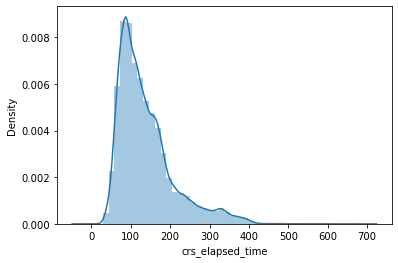

In [97]:
sns.distplot(df_8['crs_elapsed_time'])

In [98]:
df_8[['crs_elapsed_time']] #can clearly see it's in minutes

,crs_elapsed_time
0,147.0
1,292.0
2,202.0
3,90.0
4,55.0
...,...
196550,210.0
196551,89.0
196552,67.0
196553,265.0


In [99]:
def length_category(df,col):
    '''Will establish what kind of flight had taken place based on the expected elapsed flight time
    [0-3) hours: short
    [3-6) hours: medium
    >6 hours: long'''
    duration_type = []
    for i in df[col]:
        if i / 60 < 3:
            duration_type.append('Short')
        elif (i / 60 > 3) & (i/60 <6):
            duration_type.append('Medium')
        else:
            duration_type.append('Long')
    
    df['Duration Category'] = duration_type

In [100]:
def time_category(df, col):
    ''' Based on a 24 hour clock we are going to figure out what time of the day are we dealing with.
        Either MORNING, AFTERNOON, EVENING, or OVERNIGHT category'''
    timeday = []
    for i in df[col]:
        if (i>=23) or (i<3):
            timeday.append('overnight')
        elif (i>=3) and (i<10):
            timeday.append('morning')
        elif (i>=10) and (i<18):
            timeday.append('afternoon')
        elif (i>=18) and (i<23):
            timeday.append('evening')
    
    df[col] = timeday

In [69]:
# df_8.drop(columns=['crs_elapsed_time'], axis =1, inplace =True)

In [101]:
length_category(df_8,'crs_elapsed_time')

In [102]:
time_category(df_8,'crs_dep_time')

In [103]:
df_8[['Duration Category']].value_counts()

Duration Category
Short                156229
Medium                36266
Long                   4060
dtype: int64

In [104]:
df_8[['crs_dep_time']].value_counts() #may need to address this lol

crs_dep_time
overnight       196470
afternoon           39
morning             35
evening             11
dtype: int64

In [105]:
df_8[['crs_dep_time']]

,crs_dep_time
0,overnight
1,overnight
2,overnight
3,overnight
4,overnight
...,...
196550,overnight
196551,overnight
196552,overnight
196553,overnight


In [106]:
df_8[['crs_arr_time']]

,crs_arr_time
0,1821
1,1850
2,2312
3,1850
4,828
...,...
196550,1305
196551,809
196552,947
196553,2200


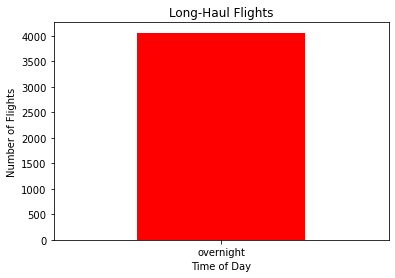

In [107]:
#have to create some function that changes a hm column to a hh output in order to compare time when flight takes off and time when flight arrives
long = df_8['Duration Category'] == 'Long'
med = df_8['Duration Category'] == 'Medium'
short = df_8['Duration Category'] == 'Short'

L = df_8[long][['crs_dep_time','mkt_carrier_fl_num']].groupby('crs_dep_time').agg('count').sort_values('mkt_carrier_fl_num',ascending=False).rename(columns={'mkt_carrier_fl_num':'num_flights'});
ax = L.plot(kind='bar', title='Long-Haul Flights',rot=0, legend=False, color='r');
ax.set(xlabel='Time of Day', ylabel='Number of Flights');


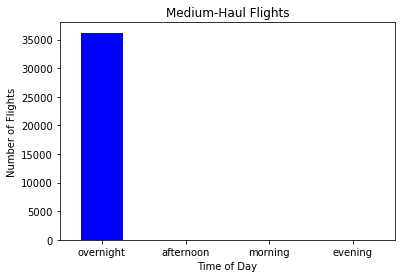

In [108]:
M = df_8[med][['crs_dep_time','mkt_carrier_fl_num']].groupby('crs_dep_time').agg('count').sort_values('mkt_carrier_fl_num',ascending=False).rename(columns={'mkt_carrier_fl_num':'num_flights'})
ax = M.plot(kind='bar', title='Medium-Haul Flights',rot=0, legend=False, color='b');
ax.set(xlabel='Time of Day', ylabel='Number of Flights');

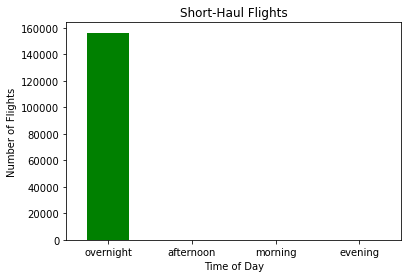

In [109]:
S = df_8[short][['crs_dep_time','mkt_carrier_fl_num']].groupby('crs_dep_time').agg('count').sort_values('mkt_carrier_fl_num',ascending=False).rename(columns={'mkt_carrier_fl_num':'num_flights'})
ax = S.plot(kind='bar', title='Short-Haul Flights',rot=0, legend=False, color='g');
ax.set(xlabel='Time of Day', ylabel='Number of Flights');